<a href="https://colab.research.google.com/github/R-k-o29/InventoryDemand/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('/content/demandData - Sheet1.csv')
display(df.head())
display(df.tail())


,Unnamed: 0,date,store,item,sales
0,0,2013-01-01,1,1,24
1,1,2013-01-02,1,1,11
2,2,2013-01-03,1,1,14
3,3,2013-01-04,1,1,13
4,4,2013-01-05,1,1,10


,Unnamed: 0,date,store,item,sales
85,85,2013-03-27,3,2,29
86,86,2013-03-28,3,1,18
87,87,2013-03-29,1,1,31
88,88,2013-03-30,1,1,17
89,89,2013-03-31,1,2,32


In [ ]:
df.shape


(90, 5)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  90 non-null     int64 
 1   date        90 non-null     object
 2   store       90 non-null     int64 
 3   item        90 non-null     int64 
 4   sales       90 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 3.6+ KB


In [ ]:
df.describe()


,Unnamed: 0,store,item,sales
count,90.000000,90.000000,90.000000,90.00000
mean,44.500000,1.533333,1.888889,17.20000
std,26.124701,0.690221,0.999376,6.05629
min,0.000000,1.000000,1.000000,10.00000
25%,22.250000,1.000000,1.000000,12.25000
50%,44.500000,1.000000,2.000000,15.00000
75%,66.750000,2.000000,2.000000,21.00000
max,89.000000,3.000000,5.000000,35.00000


In [ ]:
parts = df["date"].str.split("-", n = 3, expand = True)
df["year"]= parts[0].astype('int')
df["month"]= parts[1].astype('int')
df["day"]= parts[2].astype('int')
df.head()


,Unnamed: 0,date,store,item,sales,year,month,day
0,0,2013-01-01,1,1,24,2013,1,1
1,1,2013-01-02,1,1,11,2013,1,2
2,2,2013-01-03,1,1,14,2013,1,3
3,3,2013-01-04,1,1,13,2013,1,4
4,4,2013-01-05,1,1,10,2013,1,5


In [ ]:
from datetime import datetime
import calendar

def weekend_or_weekday(year,month,day):

	d = datetime(year,month,day)
	if d.weekday()>4:
		return 1
	else:
		return 0

df['weekend'] = df.apply(lambda x:weekend_or_weekday(x['year'], x['month'], x['day']), axis=1)
df.head()


,Unnamed: 0,date,store,item,sales,year,month,day,weekend
0,0,2013-01-01,1,1,24,2013,1,1,0
1,1,2013-01-02,1,1,11,2013,1,2,0
2,2,2013-01-03,1,1,14,2013,1,3,0
3,3,2013-01-04,1,1,13,2013,1,4,0
4,4,2013-01-05,1,1,10,2013,1,5,1


In [ ]:
from datetime import date
import holidays

In [ ]:
def is_holiday(x):

    india_holidays = holidays.country_holidays('IN')
    if india_holidays.get(x):
	    return 1
    else:
	    return 0
df['holidays'] = df['date'].apply(is_holiday)
df.head()


,Unnamed: 0,date,store,item,sales,year,month,day,weekend,holidays
0,0,2013-01-01,1,1,24,2013,1,1,0,0
1,1,2013-01-02,1,1,11,2013,1,2,0,0
2,2,2013-01-03,1,1,14,2013,1,3,0,0
3,3,2013-01-04,1,1,13,2013,1,4,0,0
4,4,2013-01-05,1,1,10,2013,1,5,1,0


In [ ]:
df['m1'] = np.sin(df['month'] * (2 * np.pi / 12))
df['m2'] = np.cos(df['month'] * (2 * np.pi / 12))
df.head()


,Unnamed: 0,date,store,item,sales,year,month,day,weekend,holidays,m1,m2
0,0,2013-01-01,1,1,24,2013,1,1,0,0,0.5,0.866025
1,1,2013-01-02,1,1,11,2013,1,2,0,0,0.5,0.866025
2,2,2013-01-03,1,1,14,2013,1,3,0,0,0.5,0.866025
3,3,2013-01-04,1,1,13,2013,1,4,0,0,0.5,0.866025
4,4,2013-01-05,1,1,10,2013,1,5,1,0,0.5,0.866025


In [ ]:
def which_day(year, month, day):

	d = datetime(year,month,day)
	return d.weekday()

df['weekday'] = df.apply(lambda x: which_day(x['year'],
													x['month'],
													x['day']),
								axis=1)
df.head()


,Unnamed: 0,date,store,item,sales,year,month,day,weekend,holidays,m1,m2,weekday
0,0,2013-01-01,1,1,24,2013,1,1,0,0,0.5,0.866025,1
1,1,2013-01-02,1,1,11,2013,1,2,0,0,0.5,0.866025,2
2,2,2013-01-03,1,1,14,2013,1,3,0,0,0.5,0.866025,3
3,3,2013-01-04,1,1,13,2013,1,4,0,0,0.5,0.866025,4
4,4,2013-01-05,1,1,10,2013,1,5,1,0,0.5,0.866025,5


In [ ]:
df.drop('date', axis=1, inplace=True)


In [ ]:
df['store'].nunique(), df['item'].nunique()


(3, 5)

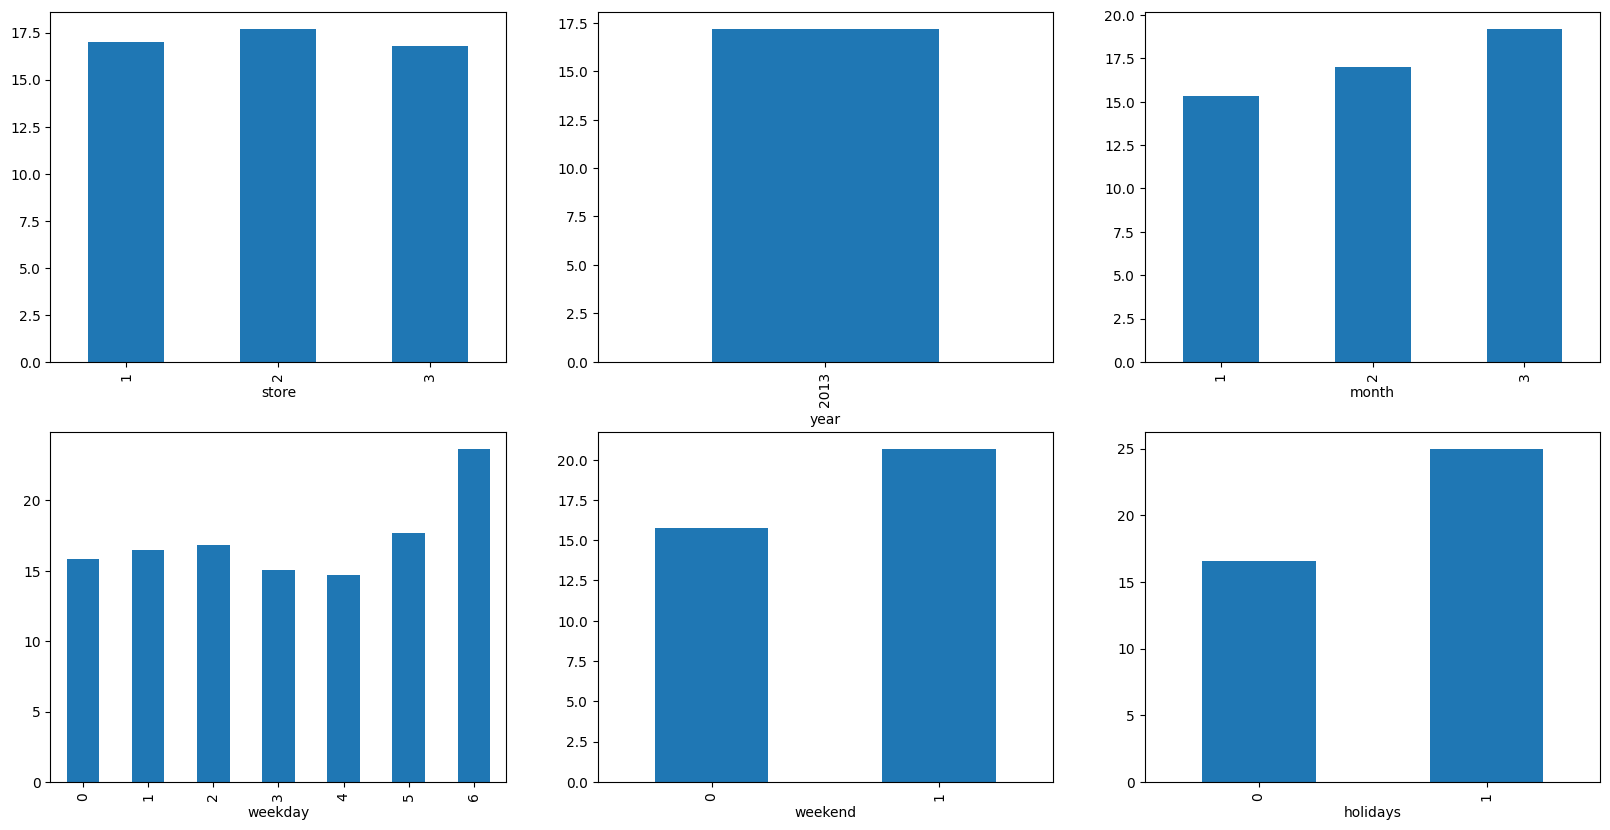

In [ ]:
features = ['store', 'year', 'month','weekday', 'weekend', 'holidays']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
	plt.subplot(2, 3, i + 1)
	df.groupby(col).mean()['sales'].plot.bar()
plt.show()


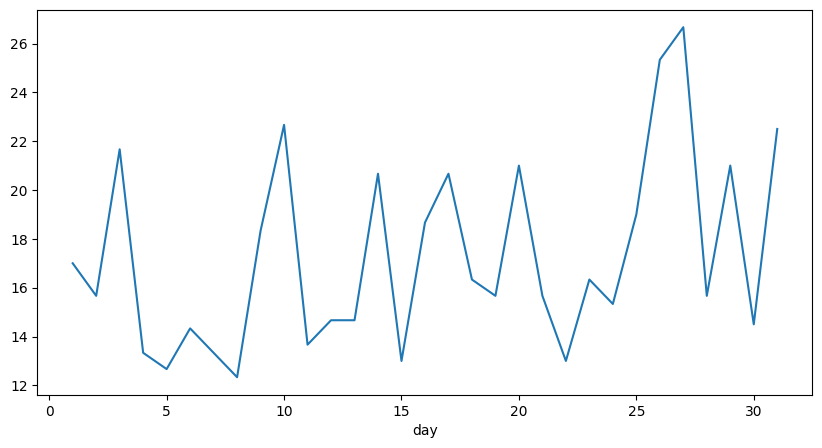

In [ ]:
plt.figure(figsize=(10,5))
df.groupby('day').mean()['sales'].plot()
plt.show()


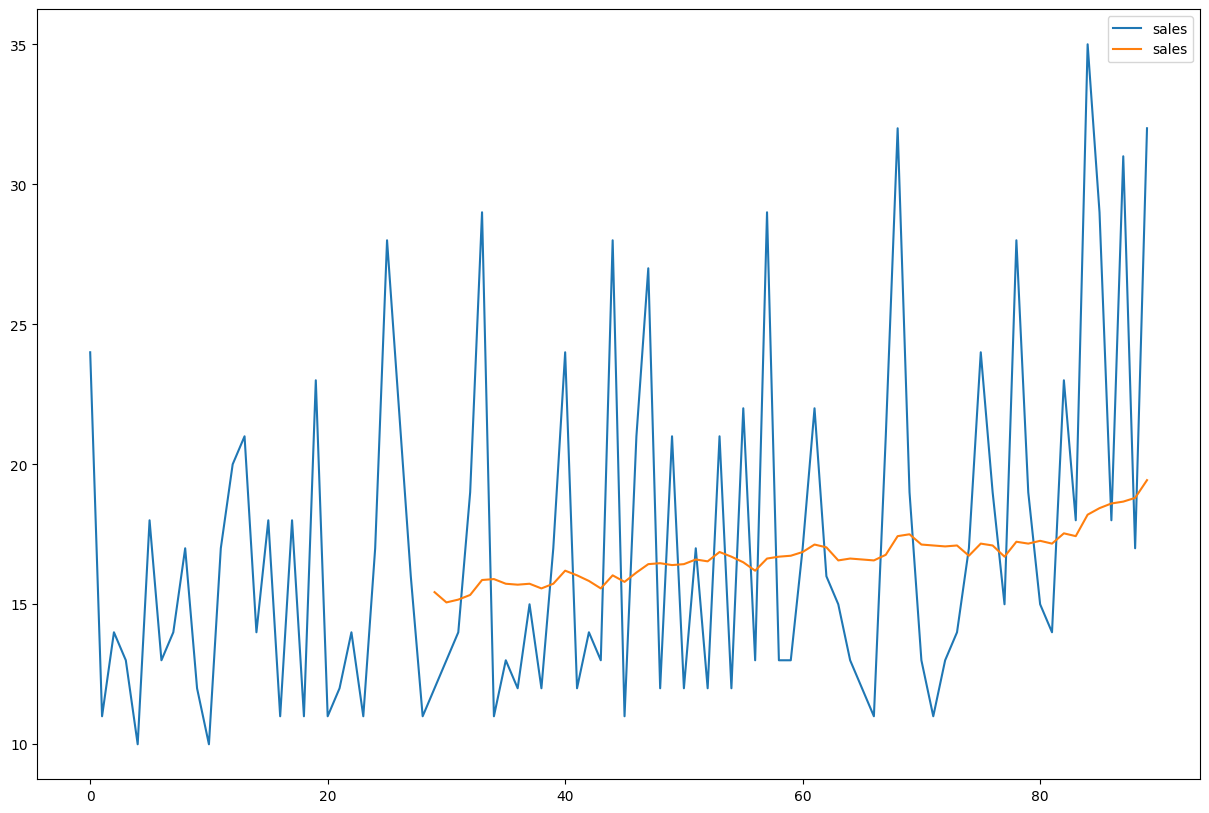

In [ ]:
plt.figure(figsize=(15, 10))

# Calculating Simple Moving Average
# for a window period of 30 days
window_size = 30
data = df[df['year']==2013]
windows = data['sales'].rolling(window_size)
sma = windows.mean()
sma = sma[window_size - 1:]

data['sales'].plot()
sma.plot()
plt.legend()
plt.show()


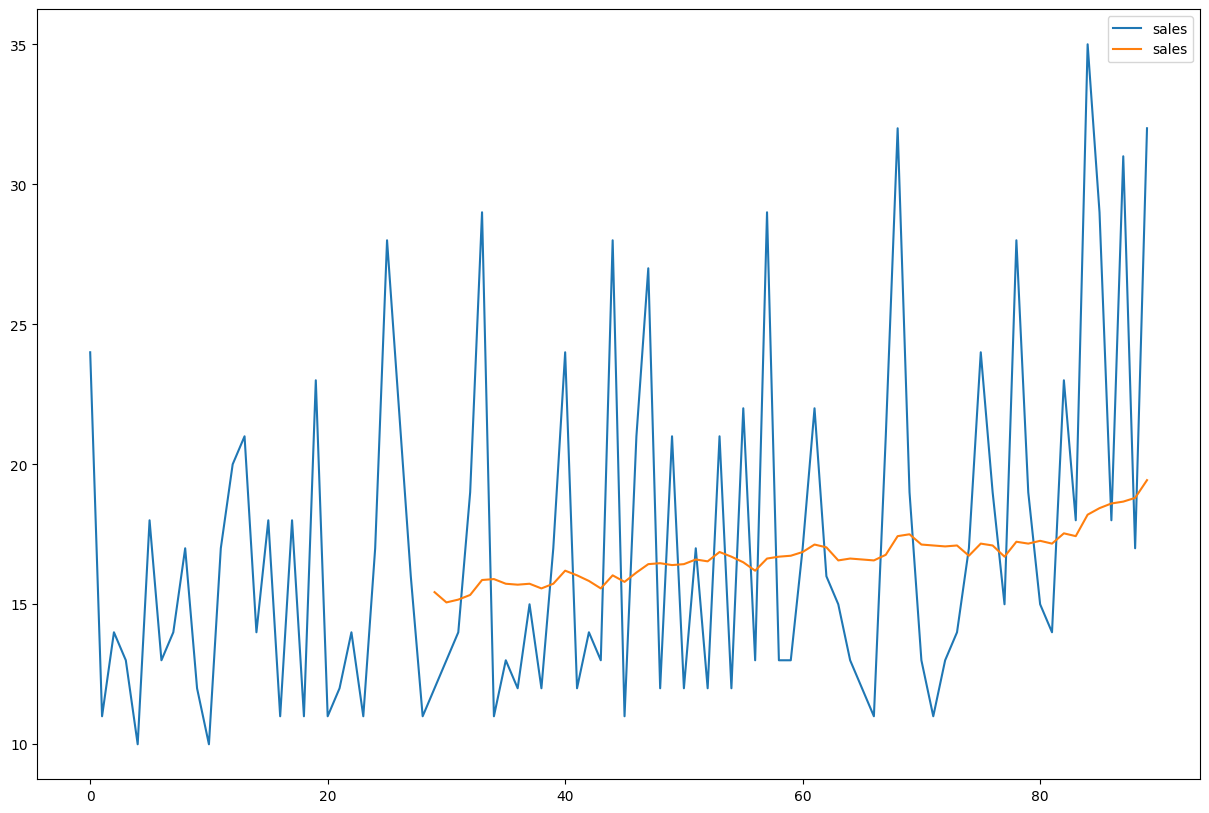

In [ ]:
plt.figure(figsize=(15, 10))

# Calculating Simple Moving Average
# for a window period of 30 days
window_size = 30
data = df[df['year']==2013]
windows = data['sales'].rolling(window_size)
sma = windows.mean()
sma = sma[window_size - 1:]

data['sales'].plot()
sma.plot()
plt.legend()
plt.show()


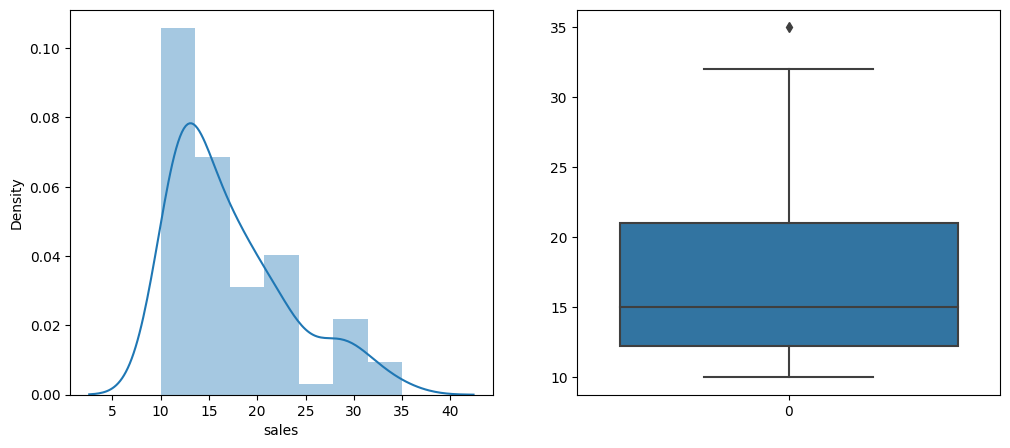

In [ ]:
plt.subplots(figsize=(12, 5))
plt.subplot(1, 2, 1)
sb.distplot(df['sales'])

plt.subplot(1, 2, 2)
sb.boxplot(df['sales'])
plt.show()


In [ ]:
df = df[df['sales']<140]


In [ ]:
features = df.drop(['sales', 'year'], axis=1)
target = df['sales'].values


X_train, X_val, Y_train, Y_val = train_test_split(features, target,
												test_size = 0.05,
												random_state=22)
X_train.shape, X_val.shape


((85, 10), (5, 10))

In [ ]:
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


In [ ]:
models = [LinearRegression(), XGBRegressor(), Lasso(), Ridge()]

for i in range(4):
	models[i].fit(X_train, Y_train)

	print(f'{models[i]} : ')

	train_preds = models[i].predict(X_train)
	print('Training Error : ', mae(Y_train, train_preds))

	val_preds = models[i].predict(X_val)
	print('Validation Error : ', mae(Y_val, val_preds))
	print()


LinearRegression() : 
Training Error :  3.813410112024544
Validation Error :  2.601962925260942

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) : 
Training Error :  0.00525810017305262
Validation Error :  3.4271871566772463

Lasso() : 
Training Error :  4.247684857632719
Validation Error :  4.003168